In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [5]:
df = pd.read_csv("car data.csv")


In [6]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [7]:
df.shape

(301, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [11]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [12]:
df.Fuel_Type.value_counts()

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

In [15]:
df.Transmission.value_counts()

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64

In [22]:
df.Owner.value_counts()

Owner
0    290
1     10
3      1
Name: count, dtype: int64

In [21]:
df["Transmission"].nunique()

2

In [24]:
X = df.drop(['Car_Name','Selling_Price'],axis=1)
Y = df['Selling_Price']

In [25]:
X

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,Petrol,Dealer,Manual,0
1,2013,9.54,43000,Diesel,Dealer,Manual,0
2,2017,9.85,6900,Petrol,Dealer,Manual,0
3,2011,4.15,5200,Petrol,Dealer,Manual,0
4,2014,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,Diesel,Dealer,Manual,0
297,2015,5.90,60000,Petrol,Dealer,Manual,0
298,2009,11.00,87934,Petrol,Dealer,Manual,0
299,2017,12.50,9000,Diesel,Dealer,Manual,0


In [26]:
Y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.1, random_state =2)

In [32]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn.compose import ColumnTransformer

In [36]:
transformer = ColumnTransformer(transformers=[
    ('tnf',OneHotEncoder(drop='first'),['Fuel_Type','Seller_Type','Transmission'])
], remainder = 'passthrough')

In [43]:
X_train_new = transformer.fit_transform(X_train)

In [44]:
X_test_new = transformer.fit_transform(X_test)

In [45]:
X_train_new

array([[0.0000e+00, 1.0000e+00, 0.0000e+00, ..., 4.4300e+00, 2.8282e+04,
        0.0000e+00],
       [0.0000e+00, 1.0000e+00, 0.0000e+00, ..., 7.6000e+00, 1.7000e+04,
        0.0000e+00],
       [0.0000e+00, 1.0000e+00, 0.0000e+00, ..., 1.3600e+01, 2.1780e+04,
        0.0000e+00],
       ...,
       [0.0000e+00, 1.0000e+00, 0.0000e+00, ..., 1.8610e+01, 5.6001e+04,
        0.0000e+00],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.0790e+01, 4.3000e+04,
        0.0000e+00],
       [0.0000e+00, 1.0000e+00, 1.0000e+00, ..., 7.3000e-01, 1.2000e+04,
        0.0000e+00]])

### 1.Linear Regression

In [46]:
Lin_reg = LinearRegression()

In [47]:
Lin_reg.fit(X_train_new, Y_train)

LinearRegression()

In [48]:
training_data_prediction = Lin_reg.predict(X_train_new)

In [49]:
error_score = metrics.r2_score(Y_train, training_data_prediction)
print(error_score)

0.8826805250490882


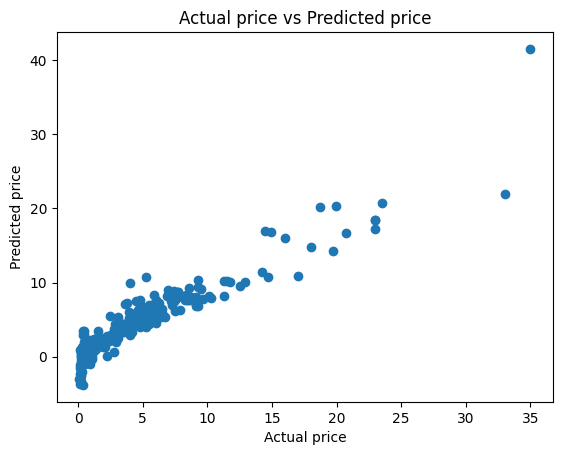

In [50]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Actual price vs Predicted price" )
plt.show()

In [51]:
testing_data_prediction = Lin_reg.predict(X_test_new)

In [52]:
error_score = metrics.r2_score(Y_test, testing_data_prediction)
print(error_score)

0.8693753727250833


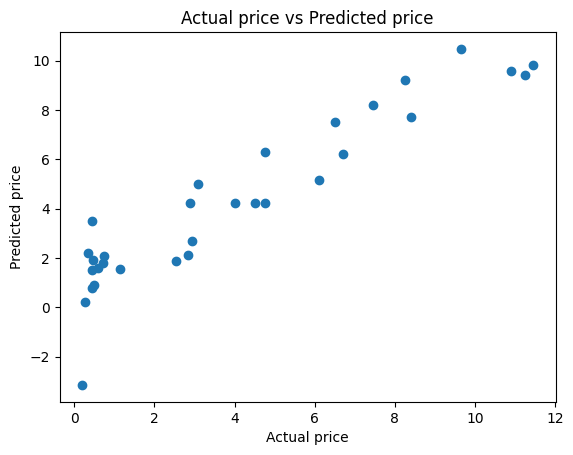

In [53]:
plt.scatter(Y_test, testing_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Actual price vs Predicted price" )
plt.show()

### 2. Lasso Regression

In [54]:
Las_reg = Lasso()

In [55]:
Las_reg.fit(X_train_new, Y_train)

Lasso()

In [56]:
training_data_prediction = Las_reg.predict(X_train_new)

In [57]:
error_score = metrics.r2_score(Y_train, training_data_prediction)
print(error_score)

0.8427860514912284


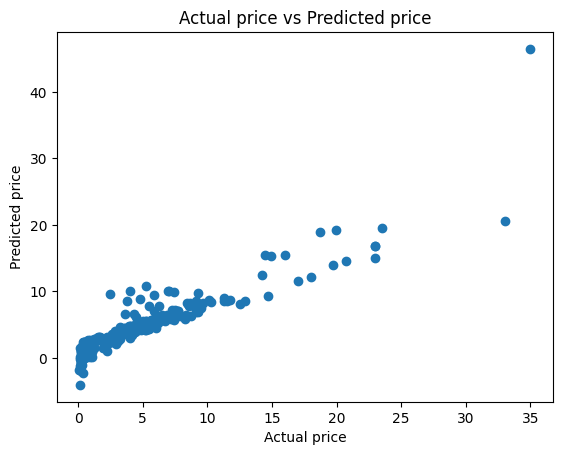

In [58]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Actual price vs Predicted price" )
plt.show()

In [61]:
testing_data_prediction = Las_reg.predict(X_test_new)

In [62]:
error_score = metrics.r2_score(Y_test, testing_data_prediction)
print(error_score)

0.8709160194843839


In [ ]:
print("For LInear Regression R score is: "